In [13]:
'''
Python for Data Analysis
Inbuilt DataFrame statistics examples

Graeme Hawker, University of Strathclyde
2018-07-23
'''

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [4]:
#create a DataFrame from an existing .csv file
#we indicate that the first column of the file is an index rather than data, and contains datetime objects
#this means that the function will attempt to construct a DatetimeIndex from this column
turbine_data = pd.read_csv('power_curve_data.csv', index_col=0, parse_dates=True)

#inspect first 5 rows
turbine_data.head()

,Windspeed,Power
Timestamp,,
2010-01-01 00:00:00,8.21859,0.527433
2010-01-01 00:10:00,10.07550,0.698405
2010-01-01 00:20:00,10.18490,0.642705
2010-01-01 00:30:00,8.56266,0.534949
2010-01-01 00:40:00,8.93533,0.394143


In [7]:
#define a domain of wind speed bins 
#(can be of different sizes - we just create an integer range for convenience)
powerCurveDomain = np.arange(0,33,1)

#use the cut function to determine which bin each wind speed belongs to
#divide up the wind speed data into the specified bins
#note cut is a top-level function in the pandas library rather than a method
pd.cut(turbine_data['Windspeed'],powerCurveDomain)

Timestamp
2010-01-01 00:00:00      (8, 9]
2010-01-01 00:10:00    (10, 11]
2010-01-01 00:20:00    (10, 11]
2010-01-01 00:30:00      (8, 9]
2010-01-01 00:40:00      (8, 9]
2010-01-01 00:50:00      (8, 9]
2010-01-01 01:00:00      (8, 9]
2010-01-01 01:10:00      (8, 9]
2010-01-01 01:20:00      (7, 8]
2010-01-01 01:30:00      (8, 9]
2010-01-01 01:40:00      (8, 9]
2010-01-01 01:50:00      (7, 8]
2010-01-01 02:00:00      (7, 8]
2010-01-01 02:10:00      (7, 8]
2010-01-01 02:20:00      (7, 8]
2010-01-01 02:30:00      (7, 8]
2010-01-01 02:40:00      (8, 9]
2010-01-01 02:50:00      (8, 9]
2010-01-01 03:00:00      (8, 9]
2010-01-01 03:10:00      (7, 8]
2010-01-01 03:20:00      (6, 7]
2010-01-01 03:30:00      (7, 8]
2010-01-01 03:40:00      (6, 7]
2010-01-01 03:50:00      (7, 8]
2010-01-01 04:00:00      (7, 8]
2010-01-01 04:10:00      (7, 8]
2010-01-01 04:20:00      (7, 8]
2010-01-01 04:30:00      (7, 8]
2010-01-01 04:40:00      (7, 8]
2010-01-01 04:50:00      (8, 9]
                         ...  

In [8]:
#add this series into the original data
turbine_data['Windspeed_bin']=pd.cut(turbine_data['Windspeed'],powerCurveDomain)
turbine_data.head()

,Windspeed,Power,Windspeed_bin
Timestamp,,,
2010-01-01 00:00:00,8.21859,0.527433,"(8, 9]"
2010-01-01 00:10:00,10.07550,0.698405,"(10, 11]"
2010-01-01 00:20:00,10.18490,0.642705,"(10, 11]"
2010-01-01 00:30:00,8.56266,0.534949,"(8, 9]"
2010-01-01 00:40:00,8.93533,0.394143,"(8, 9]"


In [10]:
#group the data by the windspeed_bin values
grouped_data = turbine_data.groupby('Windspeed_bin')

In [11]:
#return mean windspeed and power in each bin
grouped_data.mean()

,Windspeed,Power
Windspeed_bin,,
"(0, 1]",0.406196,-0.003430
"(1, 2]",1.616758,-0.002864
"(2, 3]",2.485312,-0.000857
"(3, 4]",3.496727,0.015534
"(4, 5]",4.541535,0.052570
"(5, 6]",5.477033,0.107826
"(6, 7]",6.557930,0.206245
"(7, 8]",7.545936,0.314951
"(8, 9]",8.506449,0.336916


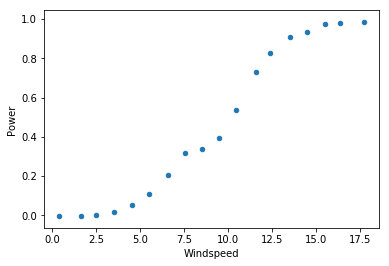

In [17]:
grouped_data.mean().plot.scatter(x='Windspeed',y='Power')